In [1]:
import os
import sys
# import json
# import requests
# import numpy as np
# import pandas as pd
# from pytz import UTC
# from datetime import timedelta
# from datetime import datetime
# from dateutil.parser import parse

sys.path.append(os.getcwd())
from binance import BINANCE_START_DATE, request_spot_tickers, dump_spot_candles
from ops import *
from simulator import Simulator

---

Параметры

In [2]:
quote_asset = 'USDT'
interval = '1h'
end_date = '2022-12-01'

DATA_DIR = '/home/ezavalnyuk/git/sirius_algo/data'
SPOT_DATA_DIR = os.path.join(DATA_DIR,'spot')

---

Выкачка данных и сохранение на локальный носитель

In [3]:
spot_base_assets = request_spot_tickers(quote_asset)
dump_spot_candles(spot_base_assets,quote_asset,interval,BINANCE_START_DATE,end_date,SPOT_DATA_DIR)

---

Симулятор

In [3]:
sim = Simulator(DATA_DIR)

In [5]:
sim.data['spot'].keys()

dict_keys(['open', 'high', 'low', 'close', 'volume', 'quote_volume', 'buy_volume', 'buy_quote_volume', 'n_trades'])

---

alpha = vwap / close

In [34]:
vwap = sim.data['spot']['quote_volume']/sim.data['spot']['volume']
weights = vwap / sim.data['spot']['close']

avg daily tvr           = 3046.55%
annualized ret          = 379.14%
ir                      = 0.5419
annualized sharpe ratio = 10.35


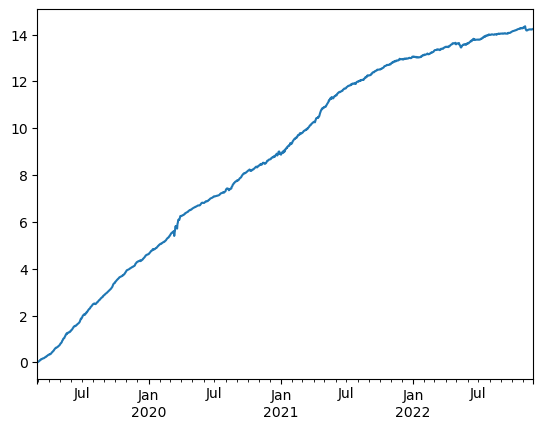

In [36]:
result = sim.run_weights(weights,universe_size=25,delay=0)
sim.show_result(result)

avg daily tvr           = 3374.91%
annualized ret          = 642.56%
ir                      = 0.6937
annualized sharpe ratio = 13.25


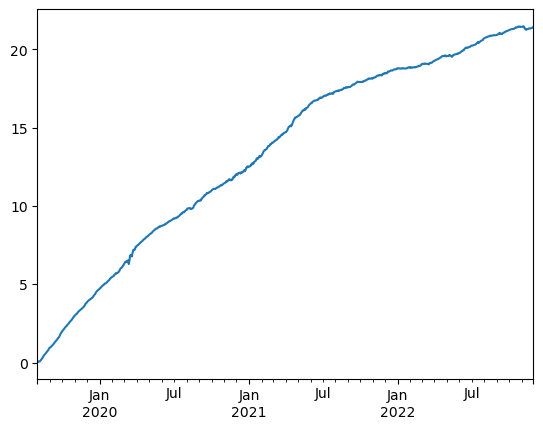

In [37]:
result = sim.run_weights(weights,universe_size=50,delay=0)
sim.show_result(result)

avg daily tvr           = 3468.58%
annualized ret          = 936.76%
ir                      = 0.7915
annualized sharpe ratio = 15.12


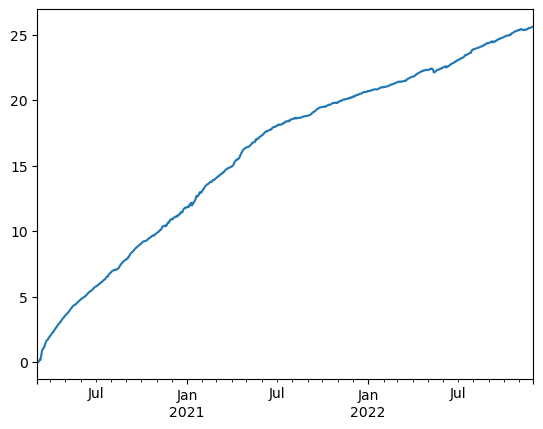

In [38]:
result = sim.run_weights(weights,universe_size=100,delay=0)
sim.show_result(result)

avg daily tvr           = 3491.08%
annualized ret          = 1055.92%
ir                      = 0.7314
annualized sharpe ratio = 13.97


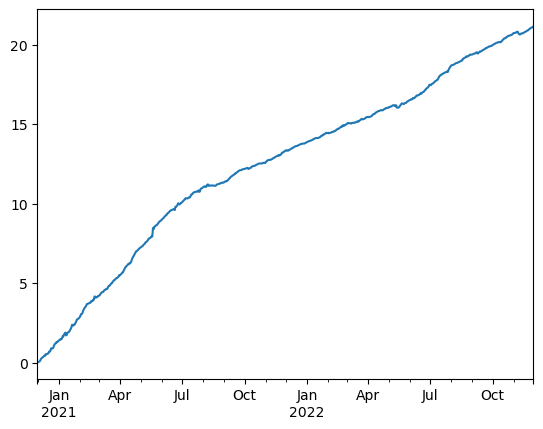

In [39]:
result = sim.run_weights(weights,universe_size=200,delay=0)
sim.show_result(result)

avg daily tvr           = 3504.43%
annualized ret          = 855.64%
ir                      = 0.8718
annualized sharpe ratio = 16.66


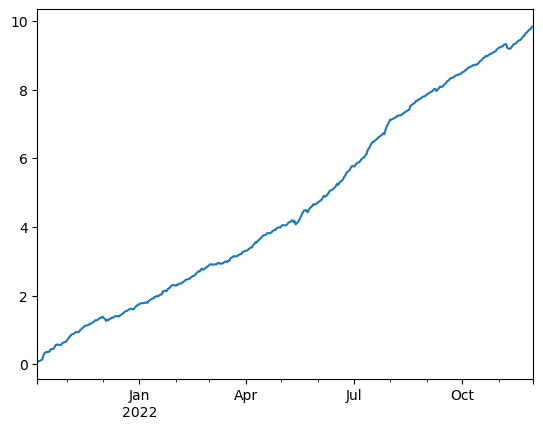

In [40]:
result = sim.run_weights(weights,universe_size=300,delay=0)
sim.show_result(result)

---

alpha = - (buy_volume-sell_volume)/(buy_volume+sell_volume)

In [24]:
weights = -(2*sim.data['spot']['buy_quote_volume']-sim.data['spot']['quote_volume']) / sim.data['spot']['quote_volume']

avg daily tvr           = 2637.2%
annualized ret          = 58.88%
ir                      = 0.1126
annualized sharpe ratio = 2.15


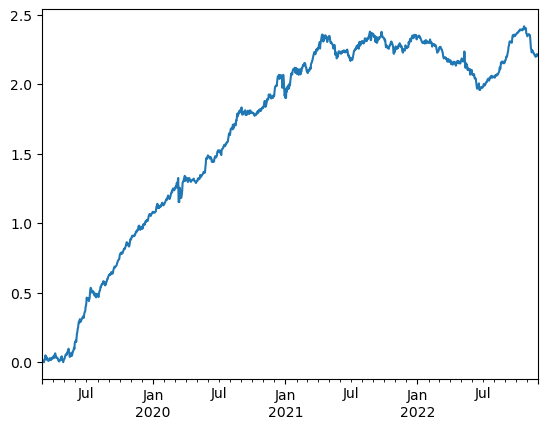

In [26]:
result = sim.run_weights(weights,universe_size=25,delay=0)
sim.show_result(result)

avg daily tvr           = 3038.77%
annualized ret          = 105.97%
ir                      = 0.1873
annualized sharpe ratio = 3.58


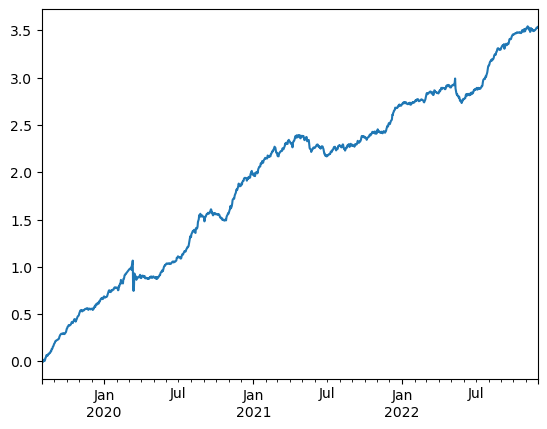

In [27]:
result = sim.run_weights(weights,universe_size=50,delay=0)
sim.show_result(result)

avg daily tvr           = 3144.15%
annualized ret          = 178.97%
ir                      = 0.4382
annualized sharpe ratio = 8.37


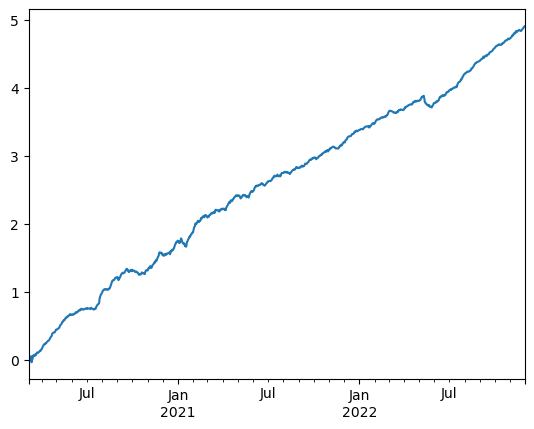

In [29]:
result = sim.run_weights(weights,universe_size=100,delay=0)
sim.show_result(result)

avg daily tvr           = 3196.61%
annualized ret          = 231.91%
ir                      = 0.6752
annualized sharpe ratio = 12.9


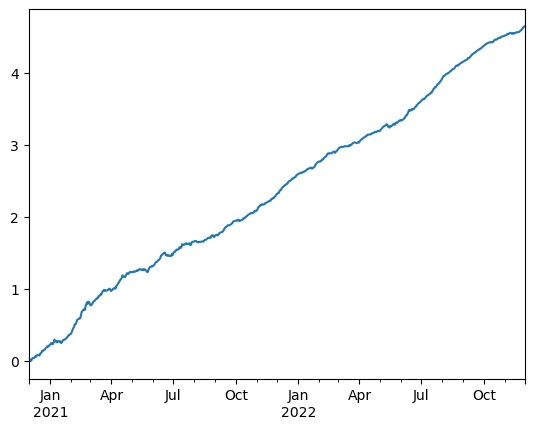

In [30]:
result = sim.run_weights(weights,universe_size=200,delay=0)
sim.show_result(result)

avg daily tvr           = 3223.4%
annualized ret          = 222.38%
ir                      = 0.9717
annualized sharpe ratio = 18.56


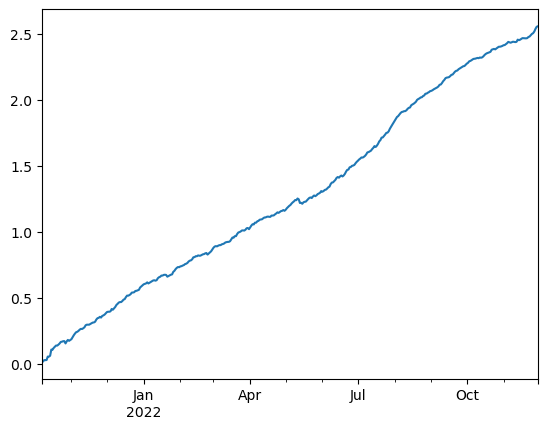

In [31]:
result = sim.run_weights(weights,universe_size=300,delay=0)
sim.show_result(result)

---

ts_rank of volume

In [33]:
weights = -ts_rank(sim.data['spot']['volume'],10)

avg daily tvr           = 2660.97%
annualized ret          = 75.32%
ir                      = 0.1745
annualized sharpe ratio = 3.33


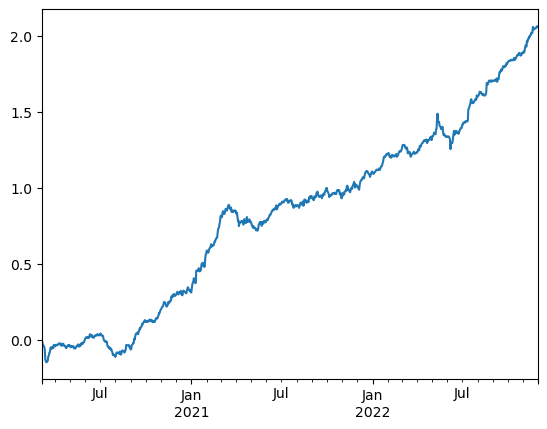

In [34]:
result = sim.run_weights(weights,universe_size=100,delay=0)
sim.show_result(result)

RSI indicator

In [45]:
close = sim.data['spot']['close']

U = close.diff()
U = U.where(U>=0,0)

D = -close.diff()
D = D.where(D>=0,0)

p = 24
RS = U.ewm(p).mean() / D.ewm(p).mean()

RSI = 100 - 100/(1+RS)

weights = -RSI

avg daily tvr           = 747.67%
annualized ret          = 257.94%
ir                      = 0.2472
annualized sharpe ratio = 4.72


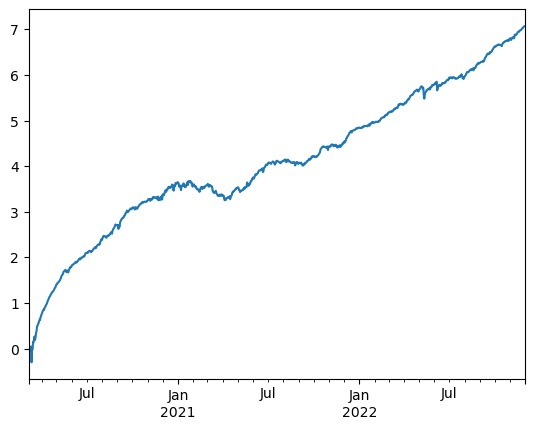

In [51]:
result = sim.run_weights(weights,universe_size=100,delay=0)
sim.show_result(result)

avg daily tvr           = 756.14%
annualized ret          = 349.08%
ir                      = 0.3566
annualized sharpe ratio = 6.81


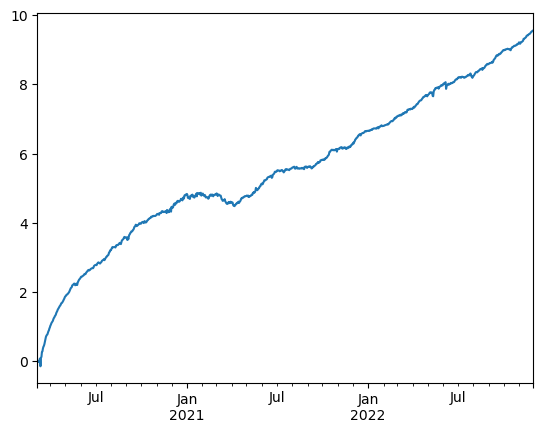

In [53]:
result = sim.run_weights(weights.where(sim.universe['spot'][100]&~sim.universe['spot'][25]),universe_size=100,delay=0)
sim.show_result(result)

In [ ]:
# check alpha = ts_zscore of close price

avg daily tvr           = 218.66%
annualized ret          = 67.68%
ir                      = 0.1133
annualized sharpe ratio = 2.17


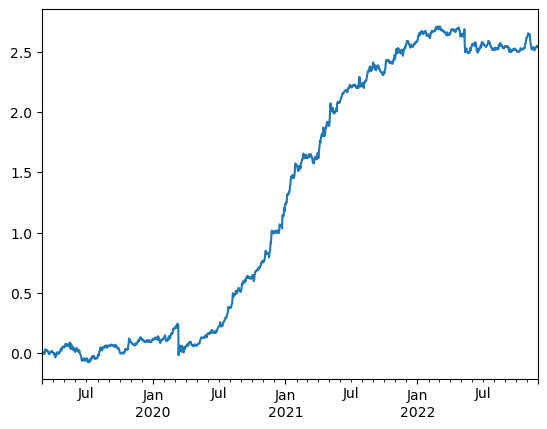

In [130]:
# close = sim.data['spot']['close']
buy_volume = sim.data['spot']['buy_volume']
weights = buy_volume.rolling(24).mean() / buy_volume.rolling(24*7).mean()
result = sim.run_weights(weights,universe_size=25,delay=0)
sim.show_result(result)

In [129]:
sim.data['spot'].keys()

dict_keys(['open', 'high', 'low', 'close', 'volume', 'quote_volume', 'buy_volume', 'buy_quote_volume', 'n_trades'])

In [133]:
close = sim.data['spot']['close']
returns = close/close.shift()-1

In [139]:
np.corrcoef(returns['BTC-USDT'].iloc[-24*7:],returns['BTC-USDT'].iloc[-24*7-1:-1])[0,1]

-0.11224065074197825

In [147]:
R = returns.where(sim.universe['spot'][25])

<AxesSubplot:>

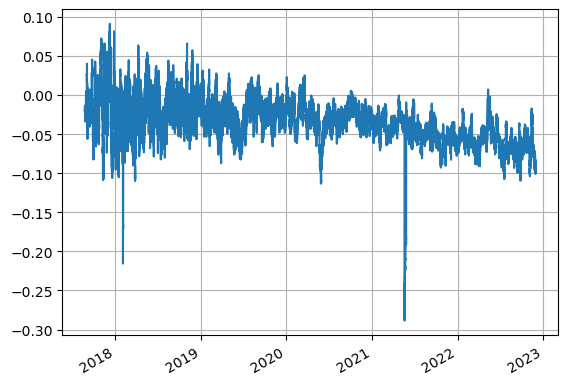

In [150]:
ts_corr(volume.shift(),neutralize(returns),24*7).median(axis=1).plot(grid=True)

avg daily tvr           = 672.64%
annualized ret          = -9.21%
ir                      = -0.0159
annualized sharpe ratio = -0.3


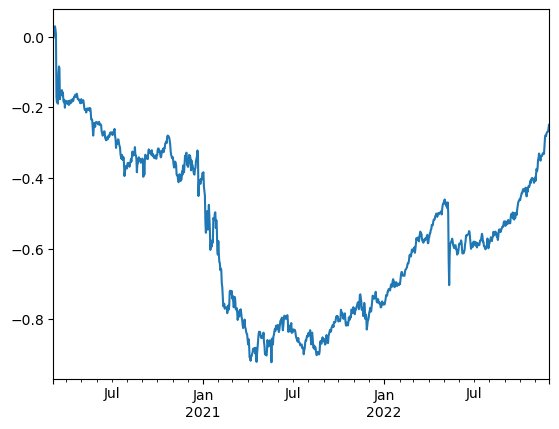

In [155]:
weights = ts_corr(volume.shift(),returns,24)# * volume/volume.rolling(24).mean()
result = sim.run_weights(weights,universe_size=100,delay=0)
sim.show_result(result)